In [1]:
# This script provides some reporting on the resolver data from identifiers.org
#
# Author: Manuel Bernal Llinares <mbdebian@gmail.com>

In [2]:
import time
import random
import requests
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline

In [3]:
# Endpoint from where the information is coming
identifiersorg_resolver_data_url = "https://identifiers.org/rest/collections/expand"
metadata_service_endpoint_from_url = "http://localhost:8082/getMetadataForUrl"

In [4]:
# Initialize pseudo-random number generator
random.seed(time.time())

In [5]:
# Request Helper
def make_rest_request_content_type_json(url):
    # TODO - Magic number here!!!
    n_attempts = 42
    response = None
    while n_attempts:
        n_attempts -= 1
        try:
            response = requests.get(url, headers={"Content-Type": "application/json"})
        except Exception as e:
            # Any possible exception counts towards the attempt counter
            # Random wait - TODO - Another magic number!!!
            time.sleep(random.randint(30))
            continue
        if response.ok:
            return response.json()
        # Random wait - TODO - Another magic number!!!
        time.sleep(random.randint(10))
    response.raise_for_status()

In [6]:
# Get the resolver data
resolver_dump = make_rest_request_content_type_json(identifiersorg_resolver_data_url)

In [7]:
# Workout how many prefixes there are in identifiers.org
prefixes = [pid_entry['prefix'] for pid_entry in resolver_dump]

In [8]:
prefixes

['chebi',
 'ensembl',
 'ec-code',
 'uniprot',
 'taxonomy',
 'biomodels.db',
 'miriam.collection',
 'icd',
 'intact',
 'interpro',
 'kegg.pathway',
 'kegg.compound',
 'kegg.reaction',
 'pubmed',
 'omim',
 'pirsf',
 'reactome',
 'doi',
 'pdb',
 'go',
 'sgd',
 'sbo',
 'kegg.drug',
 'kegg.glycan',
 'wormbase',
 'pfam',
 'insdc',
 'flybase',
 'wormpep',
 'prosite',
 'pubchem.substance',
 'pubchem.compound',
 'arxiv',
 'arrayexpress',
 'mgi',
 'sabiork.reaction',
 'refseq',
 'tcdb',
 'uniparc',
 'mint',
 'dip',
 'signaling-gateway',
 'resid',
 'rgd',
 'tair.protein',
 'tair.gene',
 'tair.locus',
 'hmdb',
 'lipidmaps',
 'peptideatlas',
 'geo',
 'eco',
 'mod',
 'sgd.pathways',
 'biogrid',
 'merops',
 'panther.family',
 'prints',
 'ligandexpo',
 'aclame',
 'isbn',
 'pride',
 '3dmet',
 'fma',
 'matrixdb.association',
 'ncbigene',
 'kegg.genes',
 'brenda',
 'pubchem.bioassay',
 'pathwaycommons',
 'hovergen',
 'mmmp:biomaps',
 'wikipathways',
 'macie',
 'mirbase',
 'zfin',
 'hgnc',
 'so',
 'rhea',

In [9]:
print("There are #{} Compact ID prefixes registered in identifiers.org".format(len(prefixes)))

There are #629 prefixes registered in identifiers.org


In [10]:
# Check the distribution of resources
resource_prefixes = []
for pid_entry in resolver_dump:
    if 'resources' in pid_entry:
        for resource in pid_entry['resources']:
            if 'resourcePrefix' in resource:
                resource_prefixes.append(resource['resourcePrefix'])
            else:
                print("NO RESOURCE PREFIX FOR: PID Entry Name '{}', Resource Information '{}'".format(pid_entry['name'], resource['info']))


NO RESOURCE PREFIX FOR: PID Entry Name 'Ensembl', Resource Information 'Ensembl US West mirror'
NO RESOURCE PREFIX FOR: PID Entry Name 'Ensembl', Resource Information 'Ensembl US East mirror'
NO RESOURCE PREFIX FOR: PID Entry Name 'Ensembl', Resource Information 'Ensembl Asia mirror'
NO RESOURCE PREFIX FOR: PID Entry Name 'Enzyme Nomenclature', Resource Information 'KEGG Ligand Database for Enzyme Nomenclature'
NO RESOURCE PREFIX FOR: PID Entry Name 'UniProt Knowledgebase', Resource Information 'Universal Protein Resource using Persistent URL system'
NO RESOURCE PREFIX FOR: PID Entry Name 'Taxonomy', Resource Information 'Taxonomy through UniProt PURL'
NO RESOURCE PREFIX FOR: PID Entry Name 'Taxonomy', Resource Information 'Bio2RDF'
NO RESOURCE PREFIX FOR: PID Entry Name 'BioModels Database', Resource Information 'Caltech mirror'
NO RESOURCE PREFIX FOR: PID Entry Name 'BioModels Database', Resource Information 'Bio2RDF'
NO RESOURCE PREFIX FOR: PID Entry Name 'ICD', Resource Information

In [11]:
resource_prefixes

['ebi',
 'ols',
 'bptl',
 'ebi',
 'intenz',
 'expasy',
 'expenz',
 'enzymeportal',
 'ncbi',
 'ncbi',
 'ebi',
 'bptl',
 'ols',
 'ebi',
 'ebi',
 'ebi',
 'ebi',
 'ncbi',
 'hubmed',
 'epmc',
 'rcsb',
 'pdbe',
 'pdbj',
 'ebi',
 'quickgo',
 'amigo',
 'bptl',
 'ols',
 'ebi',
 'ols',
 'bptl',
 'ebi',
 'ebi',
 'ncbi',
 'expasy',
 'ncbi',
 'ncbi',
 'ebi',
 'ncbi',
 'ebi',
 'ebi',
 'ncbi',
 'ols',
 'bptl',
 'ols',
 'bptl',
 'rcsb',
 'ebi',
 'ols',
 'bptl',
 'ncbi',
 'ncbi',
 'ebi',
 'ebi',
 'bptl',
 'ols',
 'ebi',
 'ebi',
 'ebi',
 'ncbi',
 'bptl',
 'ols',
 'bptl',
 'ols',
 'ols',
 'ols',
 'bptl',
 'ols',
 'bptl',
 'ols',
 'bptl',
 'ebi',
 'ncbi',
 'ols',
 'ebi',
 'ebi',
 'bptl',
 'bptl',
 'ols',
 'bptl',
 'ols',
 'bptl',
 'ebi',
 'bptl',
 'ols',
 'ebi',
 'ncbi',
 'epmc',
 'cpmc',
 'ncbi',
 'ebi',
 'ncbi',
 'ncbi',
 'ncbi',
 'bptl',
 'ebi',
 'bptl',
 'ols',
 'quickgo',
 'ebi',
 'ebi',
 'ebi',
 'ebi',
 'ebi',
 'ncbi',
 'ebi',
 'bptl',
 'ols',
 'ols',
 'ols',
 'bptl',
 'ncbi',
 'ebi',
 'ebi',
 'ncbi

In [12]:
resource_prefixes_distribution = Counter(resource_prefixes)

In [13]:
resource_prefixes_distribution

Counter({'amigo': 2,
         'bptl': 34,
         'cpmc': 1,
         'ebi': 56,
         'enzymeportal': 1,
         'epmc': 2,
         'expasy': 2,
         'expenz': 1,
         'hubmed': 1,
         'intenz': 1,
         'ncbi': 33,
         'ols': 39,
         'pdbe': 1,
         'pdbj': 1,
         'quickgo': 2,
         'rcsb': 3,
         'sib': 1})

In [25]:
print("There #{} Resource Selectors in identifiers.org".format(len(resource_prefixes_distribution.keys())))

There #17 Resource Selectors in identifiers.org


In [15]:
labels = sorted(resource_prefixes_distribution.keys())
values = [resource_prefixes_distribution.get(key) for key in labels]

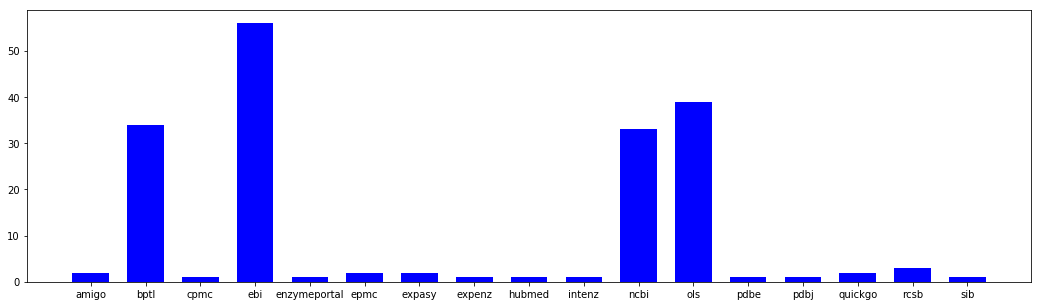

In [23]:
# I don't like this Pie Chart
fig1, ax1 = plt.subplots()
fig1.set_size_inches(18, 5)
ax1.bar(labels, values, 1/1.5, color="blue")
#ax1.pie(values, labels=labels, shadow=True, startangle=90)
#ax1.axis('equal')
plt.show()